<div style='text-align: center;'>
<h1>English Premier League Data Analysis</h1>
</div>
An EDA project that analyses the data of English Premier League of seasons 2020-21 and 2021-22.


---

<div style='text-align: justify;'>
This EDA project consists of the dataset of English Premier League of season 2020-2021 and 2021-2022. The dataset provides various
data of each matches that were conducted in the English Premier League. Each match has 2 rows, one in the Home Team's perspective and the other in the Away team's perspective. Each row have 21 columns and they are:
<br>
<ol>
<li><b>Date</b>: The date  on which the match was conducted
<li><b>Time</b>:  at which the match was schdeuled
<li><b>Day</b>: Day of the week
<li><b>Venue</b>: Whether the row showed home data or away data
<li><b>Result</b>: Match result with respect to the venue
<li><b>Goals_Home</b>: No. of goals team in reference scored
<li><b>Goals_Away</b>: No. of goals the opponent team scored
<li><b>Opp_Team</b>: The opponent team
<li><b>Exp_Goal_Home</b>: Expected goals to be scored by the team in reference
<li><b>Exp_Goal_Away</b>: Expected goals to be scored by the opponent team
<li><b>Posession_Home</b>: The ball posession percentage by the team in reference 
<li><b>Captain_Home</b>: Captain of the team in reference
<li><b>Formation</b>: The formation played by the team in reference
<li><b>Referee</b>: Name of the first referee that conducted the match
<li><b>Shots_Home</b>: The no. of shots taken by the team in reference
<li><b>Shots_On_Target_Home</b>: The no. of shots on target by the team in reference
<li><b>Avg_Shot_Dist_Home</b>: The average shot distance of the team in reference
<li><b>Penalty_Home</b>: No. of penalties taken by the team in reference
<li><b>Penalty_Away</b>: No. of penalties taken by the opponent team
<li><b>Season</b>: Season(Year) the match that took place
<li><b>Home_Team</b>: The team in reference
</div>

It is important to understand the current naming of the columns are a bit confusing and may mislead a new viewer. The 'Home' in title, in fact doesn't point to the home team, but towards the team taken in reference. Say, a match has 2 teams and each teams. One team will be the home and the other will be the away team. So, for each row of data, there are some columns that gives data only of the home team. So understanding home doesn't mean the home team, but means the reference team will make better clarification.

To avoid this, the columns are renamed. This data gives a good inference of the matches that were conducted in numerical terms. Furthermore, this data also provides good insight in performances shown by each teamns.

<div style='text-align: justify'>
The major changes made to the original dataset are:
<ol>
<li>The data's related to the seasons 2020-21(2021) and 2021-22(2022) are taken for the project
<li>Seven columns are dropped that are irrelevant for the project, namely 'undefined'(improper index), 'comp'(the column described what
  competition is the game is from, but as all games considered here are from the EPL, it is irrelevant), 'notes'(blank column), 'match
  report'(blank column), 'fk'(the data was inaccurate), 'attendance'(Too many missing data), 'Week'('Unnecessary and inaccurate data').
<li>The raw data that was provided was in .csv format which has poor datatype handling, so the file data was further stored and analysed
  using .xlsx(Excel) format.
<li>The encryption is also changed to UTF-8 to incorporate special symbols in names.
</div>
The final dataframe after necessary changes had 21 columns and 1520 records excluding header row.



<i>Imports</i>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

The dataframe is accessed by the variable 'df'

In [2]:
df = pd.read_excel('PL_matches_cpy.xlsx')

Checking for null values

In [ ]:
# print(df[df.isnull().any(axis=1)])

Only one null value is detected. It is then filled with mean value of the similar criterias

In [4]:
# fil_df = df[(df['Home_Team'] == 'Crystal Palace') & (df['Season'] == 2021)]
# medianfil=fil_df['Avg_Shot_Dist_Home'].median()
# df.loc[(df['Home_Team']=='Crystal Palace') & (df['Season']==2021) & (df['Avg_Shot_Dist_Home'].isnull()),'Avg_Shot_Dist_Home'] = medianfil
# print(df[df.isnull().any(axis=1)])

Changing the names of columns for better readability

In [5]:
# oldcolnames = df.columns.tolist()
# print(oldcolnames) 
# newcolnames = ['Date','Time','Day','Venue','Result','Goals_Home','Goals_Away','Opp_Team','Exp_Goal_Home','Exp_Goal_Opp',
#                'Posession_Home','Captain_Home','Formation','Referee','Shots_Home','Shots_On_Target_Home',
#                'Avg_Shot_Dist_Home','Penalty_Home','Penalty_Opp','Season','Home_Team']
# renameDict = dict(zip(oldcolnames,newcolnames))
# print(renameDict)
# df.rename(columns=renameDict,inplace=True)
# print(df.head())

Rearranging the columns of the dataset

In [6]:
# new_col_order = ['Date','Time','Day','Home_Team','Opp_Team','Result','Goals_Home','Goals_Away','Exp_Goal_Home','Exp_Goal_Opp',
#                'Shots_Home','Shots_On_Target_Home','Avg_Shot_Dist_Home','Posession_Home','Penalty_Home','Penalty_Opp','Formation',
#                'Captain_Home','Referee','Venue','Season']
# df = df[new_col_order]
# print(df.head())

Cleaning the 'Time' column

In [7]:
# df['Time']=df['Time'].str.split('(',n=1,expand=True)[0].str.strip()

Setting the proper datatypes for each columns

In [8]:
# print(df.dtypes)

Merging the columns 'Date' and 'Time' to 'DateTime', and converting them into datetime format instead of object

In [9]:
# df['DateTime'] = df['Date'] + ' ' + df['Time']
# df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d-%m-%Y %H:%M')
# df = df.drop(columns=['Date', 'Time'])
# print(df.head())
# print(df.dtypes)

Repositioning the 'Datetime' column to the first column

In [10]:
# new_col_order = ['DateTime','Day','Home_Team','Opp_Team','Result','Goals_Home','Goals_Away','Exp_Goal_Home','Exp_Goal_Opp',
#                'Shots_Home','Shots_On_Target_Home','Avg_Shot_Dist_Home','Posession_Home','Penalty_Home','Penalty_Opp','Formation',
#                'Captain_Home','Referee','Venue','Season']
# df= df[new_col_order]
# print(df.head())

Sorting the data according to the match dates, then time, then aplhabetically according to the home team.

In [11]:
# df=df.sort_values(by=['DateTime','Home_Team'])
# print(df.head())

Saving the modifications done on the original dataset

In [12]:
# Saving the modifications done on the original dataset
# df.to_excel('PL_matches_cpy2.xlsx', index=False)
# df.to_excel('PL_matches_cpy.xlsx', index=False) # This is a copy that is generated in case of corruption of original saved file

The dataframe df is further broken down into smaller dataframes based on season and venue(Every match has 2 record, one with the home teams perspective and the other as the away teams perspective)

In [13]:
df_22=df[df['Season']==2022]
df_21=df[df['Season']==2021]

Home_df_22=df_22[df_22['Venue']=='Home']
Away_df_22=df_22[df_22['Venue']=='Away']
Home_df_21=df_21[df_21['Venue']=='Home']
Away_df_21=df_21[df_21['Venue']=='Away']


<b>The dataset is now ready for analysis<b>


1. How many goals did each team score in each season?

                        Team  Total_Goals
1            Manchester City           58
2                  Liverpool           49
3          Tottenham Hotspur           38
4                    Chelsea           37
5                    Arsenal           35
6             Leicester City           34
7            West Ham United           33
8          Manchester United           32
9                Aston Villa           29
10            Crystal Palace           27
11                   Everton           27
12          Newcastle United           26
13               Southampton           23
14                 Brentford           22
15   Wolverhampton Wanderers           20
16              Leeds United           19
17  Brighton and Hove Albion           19
18                   Burnley           18
19                   Watford           17
20              Norwich City           12


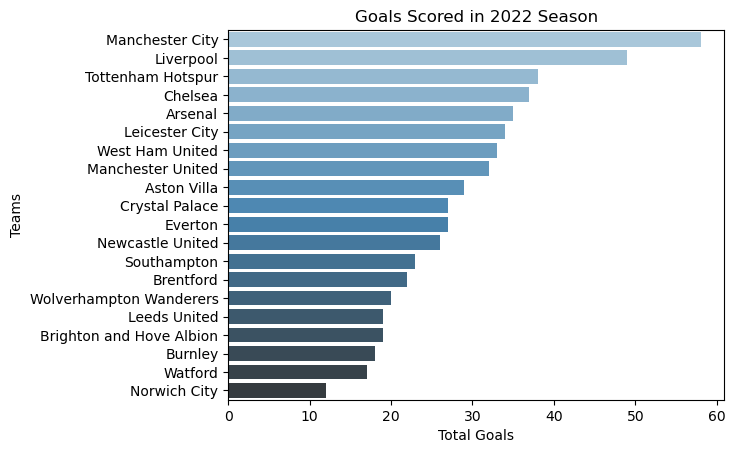

In [14]:
goals_22=Home_df_22.groupby('Ref_Team')['Goals_Ref'].sum().reset_index()
goals_22.rename(columns={'Ref_Team': 'Team', 'Goals_Ref': 'Total_Goals'}, inplace=True)
goals_22.sort_values(by='Total_Goals',ascending=False,inplace=True)
goals_22.index=range(1,len(goals_22)+1) # type:ignore
print(goals_22)


sns.barplot(data=goals_22,x='Total_Goals',y='Team',hue='Team',palette='Blues_d')
plt.xlabel('Total Goals')
plt.ylabel('Teams')
plt.title('Goals Scored in 2022 Season')
plt.show()

                        Team  Total_Goals
1            Manchester City           43
2          Manchester United           38
3          Tottenham Hotspur           35
4             Leicester City           34
5            West Ham United           32
6                    Chelsea           31
7                  Liverpool           29
8                Aston Villa           29
9                Southampton           28
10              Leeds United           28
11          Newcastle United           26
12                   Arsenal           24
13                   Everton           24
14  Brighton and Hove Albion           22
15   Wolverhampton Wanderers           21
16            Crystal Palace           20
17      West Bromwich Albion           15
18                   Burnley           14
19          Sheffield United           12
20                    Fulham            9


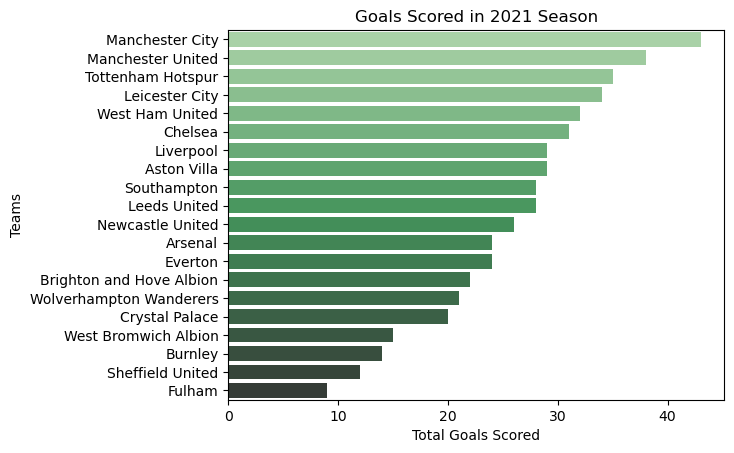

In [15]:
goals_21=Home_df_21.groupby('Ref_Team')['Goals_Ref'].sum().reset_index()
goals_21.rename(columns={'Ref_Team': 'Team', 'Goals_Ref': 'Total_Goals'}, inplace=True)
goals_21.sort_values(by='Total_Goals',ascending=False,inplace=True)
goals_21.index=range(1,len(goals_21)+1) #type: ignore
print(goals_21)

sns.barplot(data=goals_21,x='Total_Goals',y='Team',hue='Team',palette='Greens_d')
plt.xlabel('Total Goals Scored')
plt.ylabel('Teams')
plt.title('Goals Scored in 2021 Season')
plt.show()

Manchester City's goal-scoring in the 2020-21 and 2021-22 Premier League seasons played a big role in their success. With players like Ilkay Gundogan, Raheem Sterling, Phil Foden, and Kevin De Bruyne, City showed they didn’t rely on one scorer. Even without a traditional striker, goals came from all over the pitch, thanks to their fluid style of play. Gundogan’s surprising rise as a top scorer in 2020-21 and De Bruyne’s key contributions in 2021-22 were great examples of how City’s attack worked as a team, not depending on just one player. This balanced goal-scoring helped them stay strong throughout both seasons.

2. What was the overall standings at the end of each season? Also who won in each season?

In [16]:
stats21=df_21.groupby('Ref_Team')['Goals_Ref'].sum().reset_index()
results21=df_21.pivot_table(index='Ref_Team',columns='Result', aggfunc='size')
match_count_21=df_21.groupby('Ref_Team').size().reset_index(name='Matches') #type: ignore
stats21=stats21.merge(results21,on='Ref_Team').merge(match_count_21,on='Ref_Team')
stats21['Points'] = (stats21['W']*3)+stats21['D']
stats21.sort_values(by='Points', inplace=True, ascending=False)
stats21.rename(columns={'Ref_Team':'Team','Goals_Ref':'Goals','W':'Win','D':'Draw','L':'Loss'},inplace=True)
stats21=stats21[['Team','Matches','Win','Loss','Draw','Goals','Points']]
print("Premier League 2020-2021 Team Statistics:")
print(stats21.to_string(index=False))
winner=stats21['Team'].iloc[0]
print('\n',winner,"is the PL winner")

Premier League 2020-2021 Team Statistics:
                    Team  Matches  Win  Loss  Draw  Goals  Points
         Manchester City       38   27     6     5     83      86
       Manchester United       38   21     6    11     73      74
               Liverpool       38   20     9     9     68      69
                 Chelsea       38   19     9    10     58      67
          Leicester City       38   20    12     6     68      66
         West Ham United       38   19    11     8     62      65
       Tottenham Hotspur       38   18    12     8     68      62
                 Arsenal       38   18    13     7     55      61
            Leeds United       38   18    15     5     62      59
                 Everton       38   17    13     8     47      59
             Aston Villa       38   16    15     7     55      55
        Newcastle United       38   12    17     9     46      45
 Wolverhampton Wanderers       38   12    17     9     36      45
          Crystal Palace       38 

In [17]:
stats22=df_22.groupby('Ref_Team')['Goals_Ref'].sum().reset_index()
results22=df_22.pivot_table(index='Ref_Team',columns='Result', aggfunc='size')
match_count_22=df_22.groupby('Ref_Team').size().reset_index(name='Matches') #type: ignore
stats22=stats22.merge(results22,on='Ref_Team').merge(match_count_22,on='Ref_Team')
stats22['Points'] = (stats22['W']*3)+stats22['D']
stats22.sort_values(by='Points', inplace=True, ascending=False)
stats22.rename(columns={'Ref_Team':'Team','Goals_Ref':'Goals','W':'Win','D':'Draw','L':'Loss'},inplace=True)
stats22=stats22[['Team','Matches','Win','Loss','Draw','Goals','Points']]
print("Premier League 2021-2022 Team Statistics:")
print(stats22.to_string(index=False))
winner=stats21['Team'].iloc[0]
print('\n',winner,"is the PL winner")

Premier League 2021-2022 Team Statistics:
                    Team  Matches  Win  Loss  Draw  Goals  Points
         Manchester City       38   29     3     6     99      93
               Liverpool       38   28     2     8     94      92
                 Chelsea       38   21     6    11     76      74
       Tottenham Hotspur       38   22    11     5     69      71
                 Arsenal       38   22    13     3     61      69
       Manchester United       38   16    12    10     57      58
         West Ham United       38   16    14     8     60      56
          Leicester City       38   14    14    10     62      52
Brighton and Hove Albion       38   12    11    15     42      51
 Wolverhampton Wanderers       38   15    17     6     38      51
        Newcastle United       38   13    15    10     44      49
          Crystal Palace       38   11    12    15     50      48
               Brentford       38   13    18     7     48      46
             Aston Villa       38 

During the 2020-21 and 2021-22 Premier League seasons, Manchester City's success was driven by a combination of tactical brilliance, key signings, and standout individual performances. A major factor was the arrival of Ruben Dias in the summer of 2020, who quickly became a cornerstone of City’s defense. His leadership and solid partnership with John Stones helped City become one of the toughest teams to break down, with their defense being a key element in their 2020-21 title win. In the 2021-22 season, the signing of Jack Grealish for a record £100 million added creativity and flair to City's attack, as the Englishman provided crucial assists and added a dynamic edge to the team. Meanwhile, Joao Cancelo, who had joined in 2019, became one of the standout performers during the 2020-21 season, contributing both defensively and offensively with his attacking runs from full-back. Ilkay Gundogan, although not a new signing, stepped up in a major way in the 2020-21 season, particularly when key players were injured, by becoming a goal-scoring midfielder and helping fill the void left by injuries.

Tactically, Pep Guardiola played a huge role in City’s dominance, adapting his approach to suit the needs of his squad. In the 2020-21 season, Guardiola shifted to a more compact formation, focusing on controlling possession and creating a solid defense, which was key to their title run. In the following season, his bold decision to play without a traditional striker, relying on players like Phil Foden and Bernardo Silva as false nines, kept the team fluid and unpredictable, further solidifying their attacking strength. With these signings, tactical shifts, and standout performances, City was able to maintain their position as one of the best teams in Europe, winning back-to-back titles and continuing their dominance in the Premier League.

3. How did the expected goals differ from the resulted goals? Also, which teams did show maximum and minimum changes from expectations?

Season 2020-2021

In [18]:
df_21_devs=df_21[['Ref_Team','Opp_Team','Goals_Ref','Goals_Opp','Exp_Goal_Ref','Exp_Goal_Opp']].copy()
df_21_devs['Dev_Ref']=df_21_devs['Goals_Ref'] - df_21_devs['Exp_Goal_Ref']
df_21_devs['Dev_Opp']=df_21_devs['Goals_Opp'] - df_21_devs['Exp_Goal_Opp']
avg_devs_21=df_21_devs.groupby('Ref_Team').agg({
    'Dev_Ref': 'mean',
    'Dev_Opp': 'mean'
}).reset_index()

avg_devs_21.columns=['Team', 'Mean_Deviation_Goals_Ref', 'Mean_Deviation_Goals_Away']
mean_deviation_ref = avg_devs_21['Mean_Deviation_Goals_Ref'].mean()
std_deviation_ref = avg_devs_21['Mean_Deviation_Goals_Ref'].std()
min_deviation_ref = avg_devs_21['Mean_Deviation_Goals_Ref'].min()
max_deviation_ref = avg_devs_21['Mean_Deviation_Goals_Ref'].max()
median_deviation_ref = avg_devs_21['Mean_Deviation_Goals_Ref'].median()

mean_deviation_away = avg_devs_21['Mean_Deviation_Goals_Away'].mean()
std_deviation_away = avg_devs_21['Mean_Deviation_Goals_Away'].std()
min_deviation_away = avg_devs_21['Mean_Deviation_Goals_Away'].min()
max_deviation_away = avg_devs_21['Mean_Deviation_Goals_Away'].max()
median_deviation_away = avg_devs_21['Mean_Deviation_Goals_Away'].median()

print("Observed Goals vs. Expected Goals for home team")
print(f"Mean: {mean_deviation_ref.__round__(2)}")
print(f"Standard Deviation: {std_deviation_ref.__round__(2)}")
print(f"Minimum: {min_deviation_ref.__round__(2)}")
print(f"Maximum: {max_deviation_ref.__round__(2)}")
print(f"Median: {median_deviation_ref.__round__(2)}")

print("\nObserved Goals vs. Expected Goals for away team")
print(f"Mean: {mean_deviation_away.__round__(2)}")
print(f"Standard Deviation: {std_deviation_away.__round__(2)}")
print(f"Minimum: {min_deviation_away.__round__(2)}")
print(f"Maximum: {max_deviation_away.__round__(2)}")
print(f"Median: {median_deviation_away.__round__(2)}")

Observed Goals vs. Expected Goals for home team
Mean: 0.05
Standard Deviation: 0.23
Minimum: -0.36
Maximum: 0.39
Median: 0.06

Observed Goals vs. Expected Goals for away team
Mean: 0.05
Standard Deviation: 0.14
Minimum: -0.14
Maximum: 0.39
Median: 0.03


In [19]:
max_deviation_team_ref = avg_devs_21.loc[avg_devs_21['Mean_Deviation_Goals_Ref'].idxmax()]
min_deviation_team_ref = avg_devs_21.loc[avg_devs_21['Mean_Deviation_Goals_Ref'].idxmin()]
max_deviation_team_away = avg_devs_21.loc[avg_devs_21['Mean_Deviation_Goals_Away'].idxmax()]
min_deviation_team_away = avg_devs_21.loc[avg_devs_21['Mean_Deviation_Goals_Away'].idxmin()]

print(f"Team with maximum change (Home Goals): {max_deviation_team_ref['Team']} ({max_deviation_team_ref['Mean_Deviation_Goals_Ref'].round(2)})")
print(f"Team with minimum change (Home Goals): {min_deviation_team_ref['Team']} ({min_deviation_team_ref['Mean_Deviation_Goals_Ref'].round(2)})")
print(f"Team with maximum change (Away Goals): {max_deviation_team_away['Team']} ({max_deviation_team_away['Mean_Deviation_Goals_Away'].round(2)})")
print(f"Team with minimum change (Away Goals): {min_deviation_team_away['Team']} ({min_deviation_team_away['Mean_Deviation_Goals_Away'].round(2)})")

Team with maximum change (Home Goals): Manchester City (0.39)
Team with minimum change (Home Goals): Fulham (-0.36)
Team with maximum change (Away Goals): Southampton (0.39)
Team with minimum change (Away Goals): Aston Villa (-0.14)


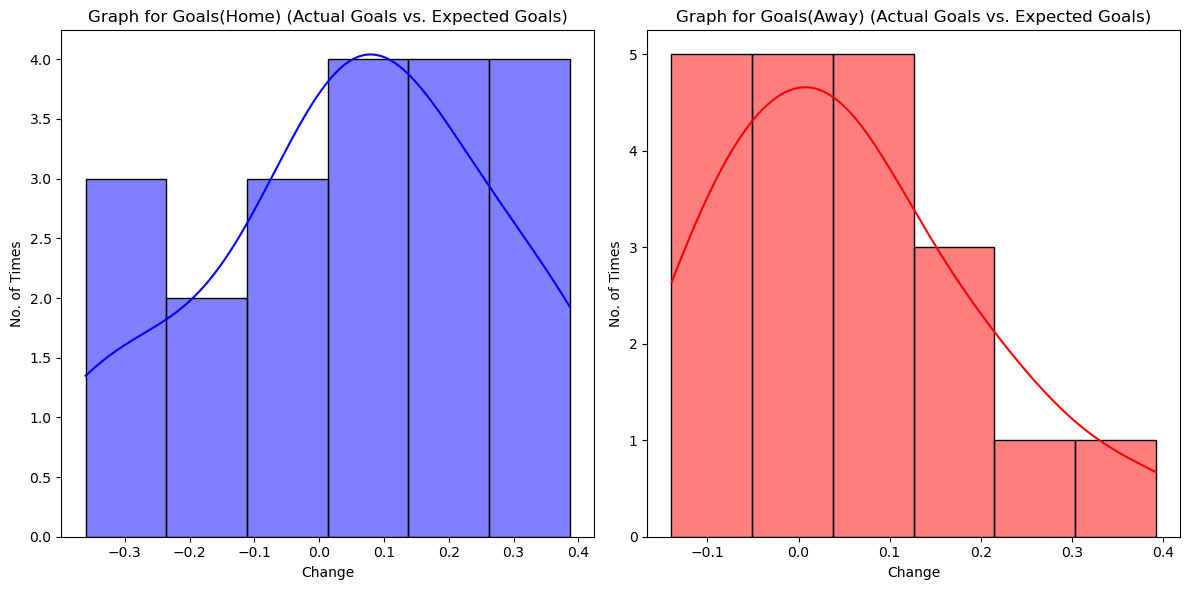

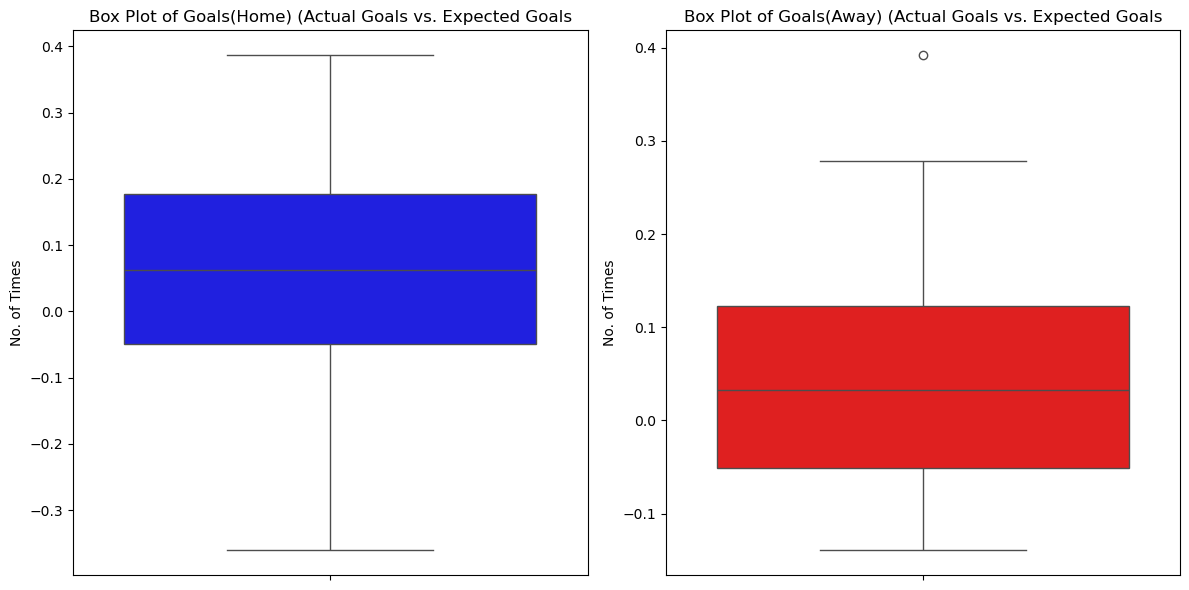

In [20]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(avg_devs_21['Mean_Deviation_Goals_Ref'], kde=True, color='blue') # type: ignore
plt.title('Graph for Goals(Home) (Actual Goals vs. Expected Goals)')
plt.xlabel('Change')
plt.ylabel('No. of Times')

plt.subplot(1, 2, 2)
sns.histplot(avg_devs_21['Mean_Deviation_Goals_Away'], kde=True, color='red') # type: ignore
plt.title('Graph for Goals(Away) (Actual Goals vs. Expected Goals)')
plt.xlabel('Change')
plt.ylabel('No. of Times')

plt.tight_layout()
plt.show()

# Box plots of deviations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=avg_devs_21['Mean_Deviation_Goals_Ref'], color='blue')
plt.title('Box Plot of Goals(Home) (Actual Goals vs. Expected Goals')
plt.ylabel('No. of Times')

plt.subplot(1, 2, 2)
sns.boxplot(y=avg_devs_21['Mean_Deviation_Goals_Away'], color='red')
plt.title('Box Plot of Goals(Away) (Actual Goals vs. Expected Goals')
plt.ylabel('No. of Times')

plt.tight_layout()
plt.show()

In the home matches, Manchester City showed the most positive change in expectations as they performed some of their career best plays in these seasons. And the least performed team was Fulham, as they didn't meet the expectations.
As for away matches, Southampton packed the most surprises as they made the most unextpected positive performances in the away grounds and the least performance was shown by Aston Villa, but observing the values, we see that this margin was way smaller.

Season 2021-2022

In [21]:
df_22_devs=df_22[['Ref_Team','Opp_Team','Goals_Ref','Goals_Opp','Exp_Goal_Ref','Exp_Goal_Opp']].copy()
df_22_devs['Dev_Ref']=df_22_devs['Goals_Ref'] - df_22_devs['Exp_Goal_Ref']
df_22_devs['Dev_Opp']=df_22_devs['Goals_Opp'] - df_22_devs['Exp_Goal_Opp']
avg_devs_22=df_22_devs.groupby('Ref_Team').agg({
    'Dev_Ref': 'mean',
    'Dev_Opp': 'mean'
}).reset_index()
avg_devs_22.columns=['Team', 'Mean_Deviation_Goals_Ref', 'Mean_Deviation_Goals_Away']
mean_deviation_ref = avg_devs_22['Mean_Deviation_Goals_Ref'].mean()
std_deviation_ref = avg_devs_22['Mean_Deviation_Goals_Ref'].std()
min_deviation_ref = avg_devs_22['Mean_Deviation_Goals_Ref'].min()
max_deviation_ref = avg_devs_22['Mean_Deviation_Goals_Ref'].max()
median_deviation_ref = avg_devs_22['Mean_Deviation_Goals_Ref'].median()

mean_deviation_away = avg_devs_22['Mean_Deviation_Goals_Away'].mean()
std_deviation_away = avg_devs_22['Mean_Deviation_Goals_Away'].std()
min_deviation_away = avg_devs_22['Mean_Deviation_Goals_Away'].min()
max_deviation_away = avg_devs_22['Mean_Deviation_Goals_Away'].max()
median_deviation_away = avg_devs_22['Mean_Deviation_Goals_Away'].median()

print("Observed Goals vs. Expected Goals for home team")
print(f"Mean: {mean_deviation_ref.__round__(2)}")
print(f"Standard Deviation: {std_deviation_ref.__round__(2)}")
print(f"Minimum: {min_deviation_ref.__round__(2)}")
print(f"Maximum: {max_deviation_ref.__round__(2)}")
print(f"Median: {median_deviation_ref.__round__(2)}")

print("\nObserved Goals vs. Expected Goals for away team")
print(f"Mean: {mean_deviation_away.__round__(2)}")
print(f"Standard Deviation: {std_deviation_away.__round__(2)}")
print(f"Minimum: {min_deviation_away.__round__(2)}")
print(f"Maximum: {max_deviation_away.__round__(2)}")
print(f"Median: {median_deviation_away.__round__(2)}")

Observed Goals vs. Expected Goals for home team
Mean: 0.07
Standard Deviation: 0.17
Minimum: -0.25
Maximum: 0.36
Median: 0.05

Observed Goals vs. Expected Goals for away team
Mean: 0.07
Standard Deviation: 0.17
Minimum: -0.36
Maximum: 0.34
Median: 0.08


In [22]:
max_deviation_team_ref = avg_devs_22.loc[avg_devs_22['Mean_Deviation_Goals_Ref'].idxmax()]
min_deviation_team_ref = avg_devs_22.loc[avg_devs_22['Mean_Deviation_Goals_Ref'].idxmin()]
max_deviation_team_away = avg_devs_22.loc[avg_devs_22['Mean_Deviation_Goals_Away'].idxmax()]
min_deviation_team_away = avg_devs_22.loc[avg_devs_22['Mean_Deviation_Goals_Away'].idxmin()]

print(f"Team with maximum change (Home Goals): {max_deviation_team_ref['Team']} ({max_deviation_team_ref['Mean_Deviation_Goals_Ref'].round(2)})")
print(f"Team with minimum change (Home Goals): {min_deviation_team_ref['Team']} ({min_deviation_team_ref['Mean_Deviation_Goals_Ref'].round(2)})")
print(f"Team with maximum change (Away Goals): {max_deviation_team_away['Team']} ({max_deviation_team_away['Mean_Deviation_Goals_Away'].round(2)})")
print(f"Team with minimum change (Away Goals): {min_deviation_team_away['Team']} ({min_deviation_team_away['Mean_Deviation_Goals_Away'].round(2)})")

Team with maximum change (Home Goals): Leicester City (0.36)
Team with minimum change (Home Goals): Norwich City (-0.25)
Team with maximum change (Away Goals): Watford (0.34)
Team with minimum change (Away Goals): Wolverhampton Wanderers (-0.36)


In this season, Leicester City showed the best performance in Home ground as they consistently played better than predicted. Norwich City showed the most negative outcome compared to predictions in Home matches. Maximum positive deviations were shown by Watford when considering Away matches and Wolves showed the most negative outcomes in Away matches to the predictions. 

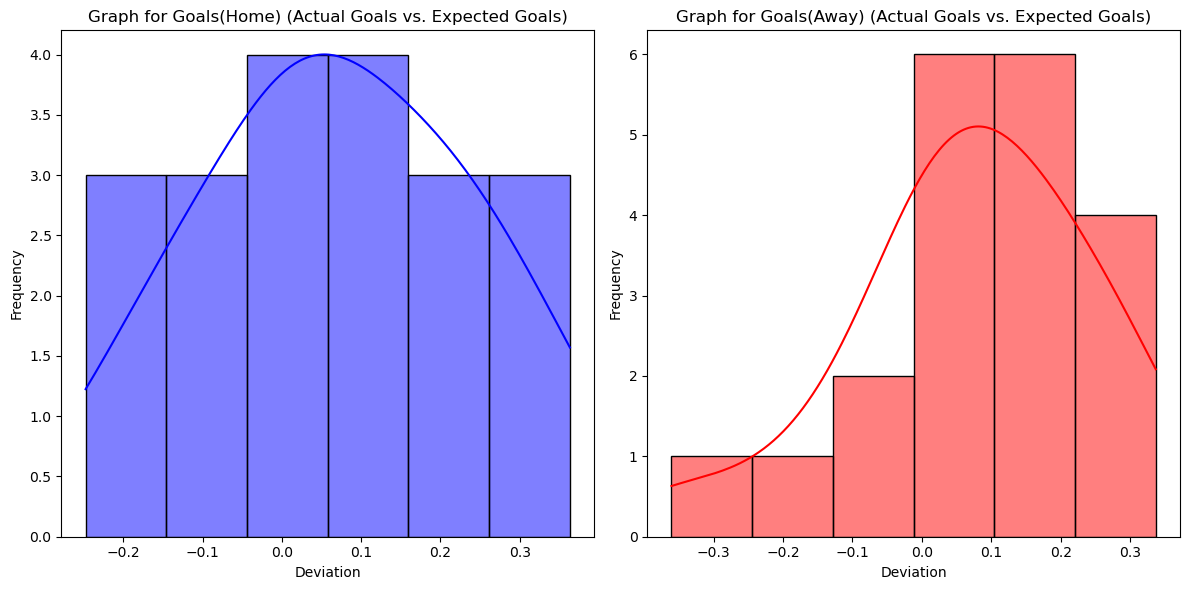

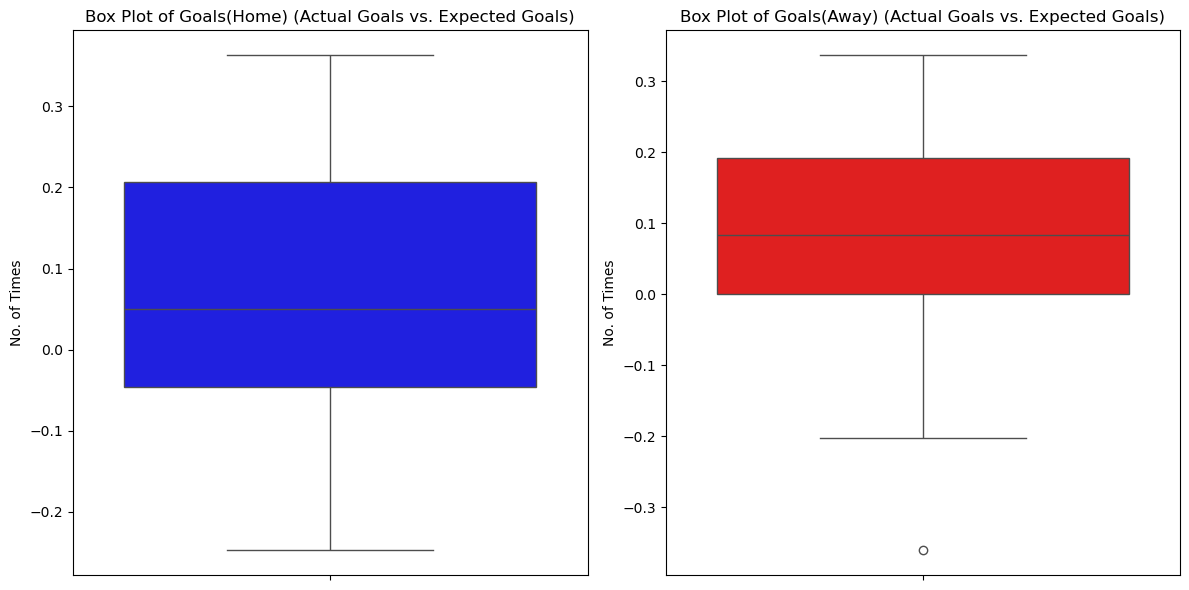

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(avg_devs_22['Mean_Deviation_Goals_Ref'], kde=True, color='blue') # type: ignore
plt.title('Graph for Goals(Home) (Actual Goals vs. Expected Goals)')
plt.xlabel('Deviation')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(avg_devs_22['Mean_Deviation_Goals_Away'], kde=True, color='red') # type: ignore
plt.title('Graph for Goals(Away) (Actual Goals vs. Expected Goals)')
plt.xlabel('Deviation')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Box plots of deviations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=avg_devs_22['Mean_Deviation_Goals_Ref'], color='blue')
plt.title('Box Plot of Goals(Home) (Actual Goals vs. Expected Goals)')
plt.ylabel('No. of Times')

plt.subplot(1, 2, 2)
sns.boxplot(y=avg_devs_22['Mean_Deviation_Goals_Away'], color='red')
plt.title('Box Plot of Goals(Away) (Actual Goals vs. Expected Goals)')
plt.ylabel('No. of Times')

plt.tight_layout()
plt.show()

4. Calculate and find the teams which are relagated from the league each season.

<i><big>The criteria for point distribution is 3 points for a win and one point for a draw. When the League ends, the last 3 teams are relagated into 2nd Division and the top 3 teams from 2nd division are promoted to Premier League.
</big></i>

In [24]:
print("Season 2020-2021 relagated teams are:")
print(stats21['Team'].tail(3).to_string(index=False))

Season 2020-2021 relagated teams are:
              Fulham
West Bromwich Albion
    Sheffield United


In [25]:
print("Season 2021-2022 relagated teams are:")
print(stats22['Team'].tail(3).to_string(index=False))

Season 2021-2022 relagated teams are:
     Burnley
     Watford
Norwich City


English Football has the most number of teams out of all the countries. And relegation is crucial to maintain the competitiveness between every teams. The best performing 3 teams from every division replaces the least performing 3 teams of the tier just above it. Every team strives to reach the top division in the English Football which is the English Premier League. In our case, the teams that are relegated are moved to the English Football League(1st Division) and the top 3 teams from EFL replaces the relegated teams of EPL.<br>
The teams that was promoted after the season 2020-21 were:
1. Norwich City(EFL Champions)
2. Watford(Second Place)
3. Brentford(1st time in EPL)

The teams that were promoted after the season 2021-22 were:
1. Fulham(EFL Champions)
2. Bournemouth(Second Place)
3. Nottingham Forest

5. Which are the top 3 candidates for the next seasons Premier League winners based on the 2022 League data? (Consider points, goal difference aggregate, possession aggregate, etc.)

In [26]:
df_22 = df[df['Season'] == 2022].copy()

df_22.loc[:, 'Goal_Difference'] = df_22['Goals_Ref'] - df_22['Goals_Opp']

team_stats = df_22.groupby('Ref_Team').agg({
    'Goals_Ref': 'sum',
    'Goals_Opp': 'sum',
    'Goal_Difference': 'sum',
    'Exp_Goal_Ref': 'sum',
    'Exp_Goal_Opp': 'sum',
    'Shots_On_Target_Ref': 'sum',
    'Posession_Ref': 'mean',
    'Result': lambda x: (x == 'W').sum() * 3 + (x == 'D').sum()
}).reset_index()

team_stats.rename(columns={
    'Ref_Team': 'Team',
    'Goals_Ref': 'Total_Goals_Scored',
    'Goals_Opp': 'Total_Goals_Conceded',
    'Goal_Difference': 'Total_Goal_Difference',
    'Exp_Goal_Ref': 'Total_Expected_Goals',
    'Exp_Goal_Opp': 'Total_Expected_Goals_Against',
    'Shots_On_Target_Ref': 'Total_Shots_On_Target',
    'Posession_Ref': 'Average_Possession',
    'Result': 'Points'
}, inplace=True)

team_stats = team_stats.sort_values(by=['Points', 'Total_Goal_Difference'], ascending=False)
team_stats['Average_Possession']=team_stats['Average_Possession'].round(2)
top_candidates = team_stats[['Team', 'Points', 'Total_Goal_Difference', 'Total_Shots_On_Target', 'Average_Possession']].head(3)
print(top_candidates.to_string(index=False))

           Team  Points  Total_Goal_Difference  Total_Shots_On_Target  Average_Possession
Manchester City      93                     73                    237               67.95
      Liverpool      92                     68                    237               62.66
        Chelsea      74                     43                    200               61.76


Here we calculated the top 3 performing teams in order to find the best team in form. These showed the top 3 candidates that could win the Premier league in the season 2022-23. They were Manchester City, Liverpool, Chelsea. These were only speculations made from the best performing team, and could've been a broad guess, but Manchester City did indeed win the Premier League in the 2022-23 season.

That wasn't the only achievement of Manchester City. They won the treble- UEFA Champions League, FA Cup, and the English Premier League title. This was achieved by the top form of Erling Haaland, the Ballan d'Or runner up, the top assists raked up by Kevin De Bruyne with his return from inury, and the masterful tactics of Pep Guardiola.

6. Which teams won most at home, lost most at home, won most away and lost most away

In [27]:
print("Season 2020-2021:")
max_home_wins = Home_df_21.groupby('Ref_Team')['Result'].apply(lambda x: (x == 'W').sum()).reset_index()
max_home_wins.columns = ['Team', 'Home_Wins']
max_home_wins = max_home_wins[max_home_wins['Home_Wins'] == max_home_wins['Home_Wins'].max()]
print("Teams with the most home wins:")
print(max_home_wins.to_string(index=False))


max_home_losses = Home_df_21.groupby('Ref_Team')['Result'].apply(lambda x: (x == 'L').sum()).reset_index()
max_home_losses.columns = ['Team', 'Home_Losses']
max_home_losses = max_home_losses[max_home_losses['Home_Losses'] == max_home_losses['Home_Losses'].max()]
print("\nTeams with the most home losses:")
print(max_home_losses.to_string(index=False))

max_away_wins = Away_df_21.groupby('Ref_Team')['Result'].apply(lambda x: (x == 'W').sum()).reset_index()
max_away_wins.columns = ['Team', 'Away_Wins']
max_away_wins = max_away_wins[max_away_wins['Away_Wins'] == max_away_wins['Away_Wins'].max()]
print("\nTeams with the most away wins:")
print(max_away_wins.to_string(index=False))

max_away_losses = Away_df_21.groupby('Ref_Team')['Result'].apply(lambda x: (x == 'L').sum()).reset_index()
max_away_losses.columns = ['Team', 'Away_Losses']
max_away_losses = max_away_losses[max_away_losses['Away_Losses'] == max_away_losses['Away_Losses'].max()]
print("\nTeams with the most away losses:")
print(max_away_losses.to_string(index=False))


Season 2020-2021:
Teams with the most home wins:
           Team  Home_Wins
Manchester City         13

Teams with the most home losses:
            Team  Home_Losses
          Fulham           13
Sheffield United           13

Teams with the most away wins:
           Team  Away_Wins
Manchester City         14

Teams with the most away losses:
            Team  Away_Losses
Sheffield United           16


In [28]:
print("Season 2021-2022:")
max_home_wins = Home_df_22.groupby('Ref_Team')['Result'].apply(lambda x: (x == 'W').sum()).reset_index()
max_home_wins.columns = ['Team', 'Home_Wins']
max_home_wins = max_home_wins[max_home_wins['Home_Wins'] == max_home_wins['Home_Wins'].max()]
print("Teams with the most home wins:")
print(max_home_wins.to_string(index=False))

max_home_losses = Home_df_22.groupby('Ref_Team')['Result'].apply(lambda x: (x == 'L').sum()).reset_index()
max_home_losses.columns = ['Team', 'Home_Losses']
max_home_losses = max_home_losses[max_home_losses['Home_Losses'] == max_home_losses['Home_Losses'].max()]
print("\nTeams with the most home losses:")
print(max_home_losses.to_string(index=False))

max_away_wins = Away_df_22.groupby('Ref_Team')['Result'].apply(lambda x: (x == 'W').sum()).reset_index()
max_away_wins.columns = ['Team', 'Away_Wins']
max_away_wins = max_away_wins[max_away_wins['Away_Wins'] == max_away_wins['Away_Wins'].max()]
print("\nTeams with the most away wins:")
print(max_away_wins.to_string(index=False))

max_away_losses = Away_df_22.groupby('Ref_Team')['Result'].apply(lambda x: (x == 'L').sum()).reset_index()
max_away_losses.columns = ['Team', 'Away_Losses']
max_away_losses = max_away_losses[max_away_losses['Away_Losses'] == max_away_losses['Away_Losses'].max()]
print("\nTeams with the most away losses:")
print(max_away_losses.to_string(index=False))


Season 2021-2022:
Teams with the most home wins:
           Team  Home_Wins
      Liverpool         15
Manchester City         15

Teams with the most home losses:
   Team  Home_Losses
Watford           15

Teams with the most away wins:
           Team  Away_Wins
Manchester City         14

Teams with the most away losses:
        Team  Away_Losses
     Everton           13
Norwich City           13


With these findings, we could observe the best form of Manchester City as they secured the most wins both in Home and Away matches, also in the both seasons. They were playing with their all-tim best squad, and the achievements speaks for itself.
Liverpool, the 2022 season runner up were also showing exceptional form in the nearby past under Jurgen Klopp, as they were lost to get a tight second position. They also tied to the most Away matches wins with Manchester City.

7. When all are the matches conducted based on time and date?

Season 2020-2021:
Matches per month:
     Month  Matches
0  2020-09       28
1  2020-10       34
2  2020-11       36
3  2020-12       57
4  2021-01       50
5  2021-02       52
6  2021-03       33
7  2021-04       39
8  2021-05       51


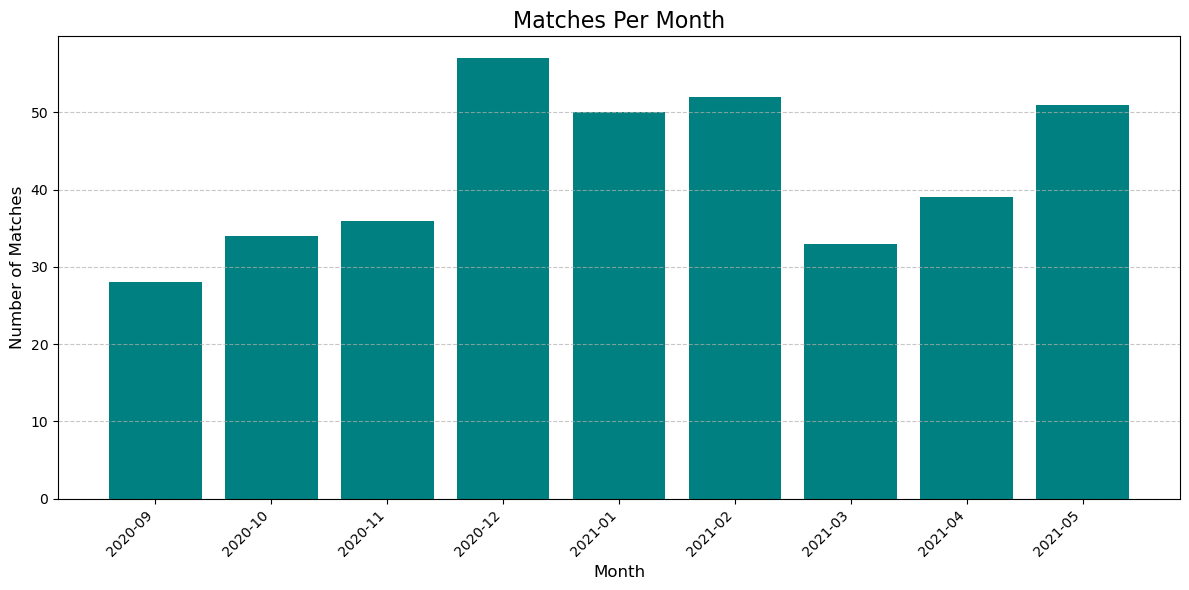

Matches per hour of the day:
Hour
12     55
13      1
14     30
15     35
16     38
17     38
18     43
19     33
20    107
Name: count, dtype: int64


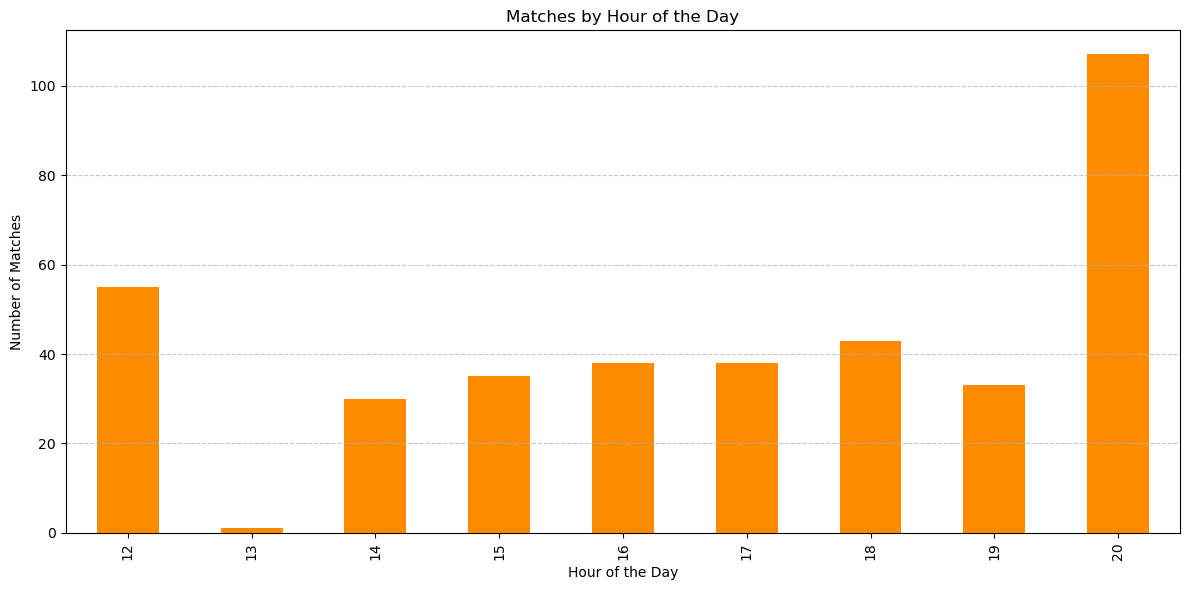

In [29]:
print('Season 2020-2021:')
Home_df_21 = Home_df_21.copy()
Home_df_21['Month'] = Home_df_21['DateTime'].dt.to_period('M')
Home_df_21['Year'] = Home_df_21['DateTime'].dt.year


matches_per_month = Home_df_21.groupby('Month').size().reset_index(name='Matches') 
print("Matches per month:")
print(matches_per_month)


plt.figure(figsize=(12, 6))
plt.bar(matches_per_month['Month'].astype(str), matches_per_month['Matches'], color='teal')
plt.title('Matches Per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Home_df_21['Hour'] = Home_df_21['DateTime'].dt.hour
matches_per_hour = Home_df_21['Hour'].value_counts().sort_index()
print("Matches per hour of the day:")
print(matches_per_hour)

plt.figure(figsize=(12, 6))
matches_per_hour.plot(kind='bar', color='darkorange')
plt.title('Matches by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Matches')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Season 2021-2022:
Matches per month:
     Month  Matches
0  2021-08       30
1  2021-09       30
2  2021-10       39
3  2021-11       32
4  2021-12       52
5  2022-01       31
6  2022-02       42
7  2022-03       32
8  2022-04       50
9  2022-05       42


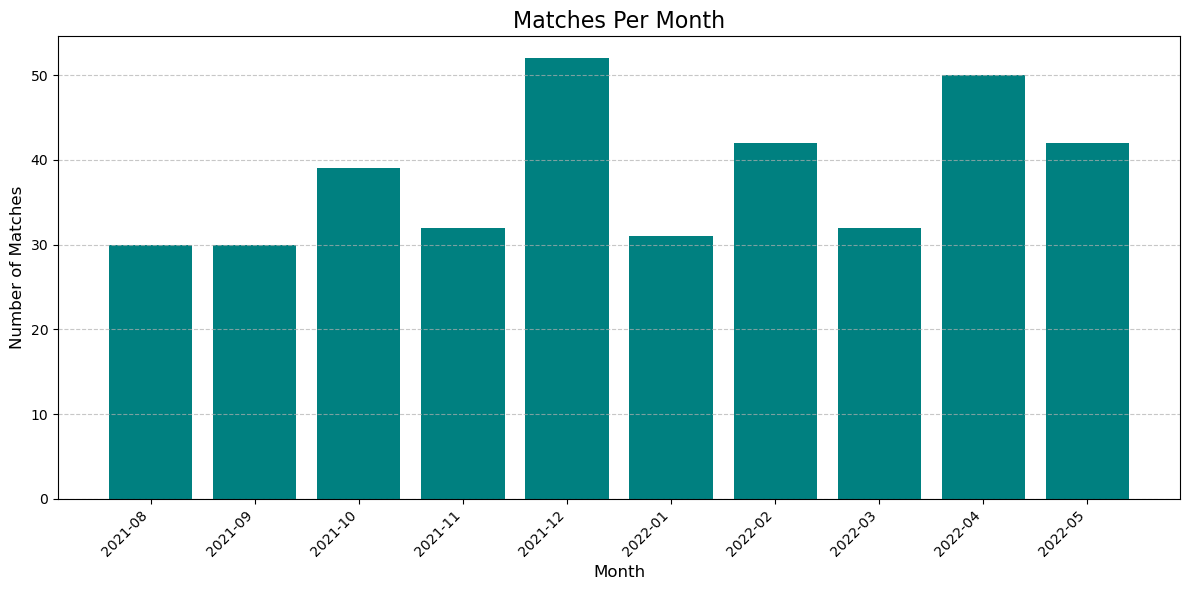

Matches per hour of the day:
Hour
12     31
14     68
15    119
16     39
17     31
18      1
19     45
20     46
Name: count, dtype: int64


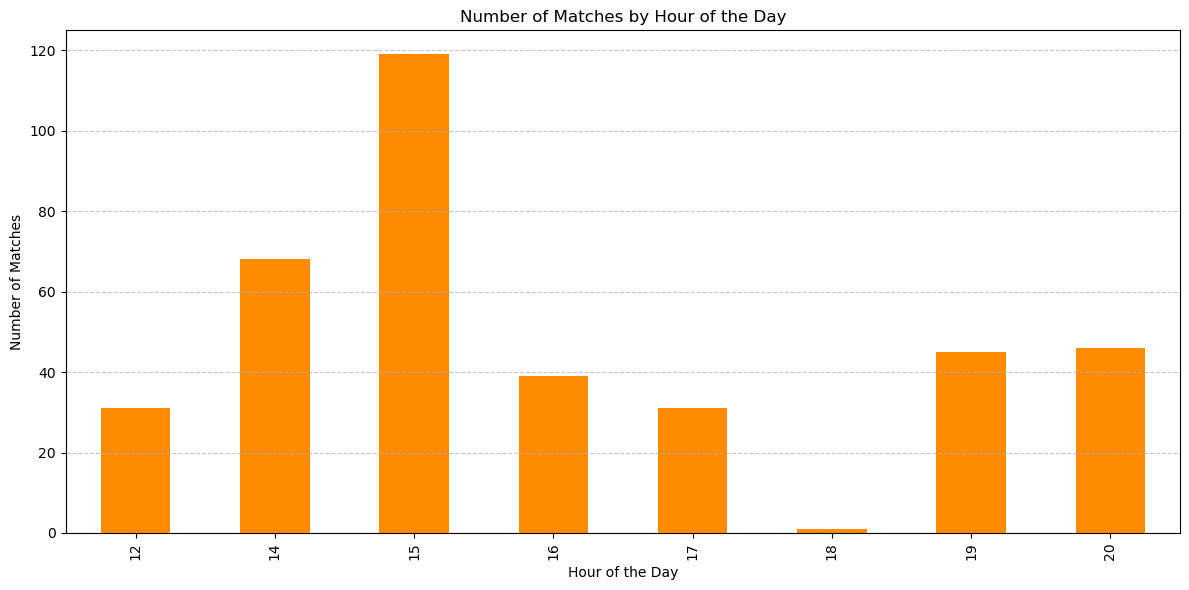

In [30]:
print("Season 2021-2022:")
Home_df_22 = Home_df_22.copy()
Home_df_22['Month'] = Home_df_22['DateTime'].dt.to_period('M')
Home_df_22['Year'] = Home_df_22['DateTime'].dt.year


matches_per_month = Home_df_22.groupby('Month').size().reset_index(name='Matches') 
print("Matches per month:")
print(matches_per_month)

plt.figure(figsize=(12, 6))
plt.bar(matches_per_month['Month'].astype(str), matches_per_month['Matches'], color='teal')
plt.title('Matches Per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()



Home_df_22['Hour'] = Home_df_22['DateTime'].dt.hour
matches_per_hour = Home_df_22['Hour'].value_counts().sort_index()
print("Matches per hour of the day:")
print(matches_per_hour)

plt.figure(figsize=(12, 6))
matches_per_hour.plot(kind='bar', color='darkorange')
plt.title('Number of Matches by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Matches')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



These plots showed the distributions of game fixtures and we can observe a shift in games tending to be avoided being conducted in 1 pm to 6 pm. This is because of the Covid Regulations, and as they were lifted, the game timings were brought back to normal, which is 1pm.

8. How many home and away wins were recorded under each referee?

In [31]:
print('Season 2020-21\n')
games_conducted = Home_df_21.groupby('Referee').size().reset_index(name='Games_Conducted') # type: ignore
home_wins = Home_df_21[Home_df_21['Result'] == 'W'].groupby('Referee').size().reset_index(name='Home_Wins') # type: ignore
away_wins = Away_df_21[Away_df_21['Result'] == 'W'].groupby('Referee').size().reset_index(name='Away_Wins') # type: ignore
draws = Home_df_21[Home_df_21['Result'] == 'D'].groupby('Referee').size().reset_index(name='Draws') # type: ignore

referee_stats = games_conducted.merge(home_wins, on='Referee', how='left')
referee_stats = referee_stats.merge(away_wins, on='Referee', how='left')
referee_stats = referee_stats.merge(draws, on='Referee', how='left')

referee_stats = referee_stats.fillna(0)
referee_stats = referee_stats.astype({'Games_Conducted': int, 'Home_Wins': int, 'Away_Wins': int, 'Draws': int})
referee_stats.sort_values(by='Games_Conducted', inplace=True, ascending=False)

print(referee_stats.to_string(index=False))


Season 2020-21

        Referee  Games_Conducted  Home_Wins  Away_Wins  Draws
 Anthony Taylor               28          7         12      9
 Michael Oliver               28          9         16      3
Martin Atkinson               26         10         12      4
 Andre Marriner               25          7         10      8
  Jonathan Moss               25         10         10      5
      Mike Dean               25          9          9      7
   Kevin Friend               25         10         11      4
   Craig Pawson               23          8          8      7
 Stuart Attwell               23          9          8      6
 Chris Kavanagh               22         10         11      1
    David Coote               21         10         10      1
   Paul Tierney               21          5          7      9
    Andy Madley               16          6          5      5
   Peter Bankes               16          6          6      4
   Graham Scott               13          6          5

In [32]:
print('Season 2021-22\n')
games_conducted = Home_df_22.groupby('Referee').size().reset_index(name='Games_Conducted') # type: ignore
home_wins = Home_df_22[Home_df_22['Result'] == 'W'].groupby('Referee').size().reset_index(name='Home_Wins') # type: ignore
away_wins = Away_df_22[Away_df_22['Result'] == 'W'].groupby('Referee').size().reset_index(name='Away_Wins') # type: ignore
draws = Home_df_22[Home_df_22['Result'] == 'D'].groupby('Referee').size().reset_index(name='Draws') # type: ignore

referee_stats = games_conducted.merge(home_wins, on='Referee', how='left')
referee_stats = referee_stats.merge(away_wins, on='Referee', how='left')
referee_stats = referee_stats.merge(draws, on='Referee', how='left')

referee_stats = referee_stats.fillna(0)
referee_stats = referee_stats.astype({'Games_Conducted': int, 'Home_Wins': int, 'Away_Wins': int, 'Draws': int})
referee_stats.sort_values(by='Games_Conducted', inplace=True, ascending=False)

print(referee_stats.to_string(index=False))

Season 2021-22

          Referee  Games_Conducted  Home_Wins  Away_Wins  Draws
   Anthony Taylor               28         12          7      9
     Paul Tierney               27         10         10      7
     Craig Pawson               26         13          9      4
        Mike Dean               26          9          9      8
   Michael Oliver               26         14          7      5
  Martin Atkinson               26         14          8      4
    Jonathan Moss               25         16          6      3
   Stuart Attwell               20         12          4      4
      David Coote               20          5          8      7
   Andre Marriner               19          5         11      3
     Kevin Friend               18          6          9      3
   Chris Kavanagh               18          6          6      6
      Andy Madley               16         10          4      2
   Darren England               15          7          4      4
     Simon Hooper       

From the referee analysis, we see familiar names like Anthony Taylor, Michael Oliver, Paul Tierney top the charts for conducting the most games. They were well respected referees, and so their draws tend to be more.

9. Do a captain analysis. Which capatins has more wins under them? Visualize the top 10 captains.

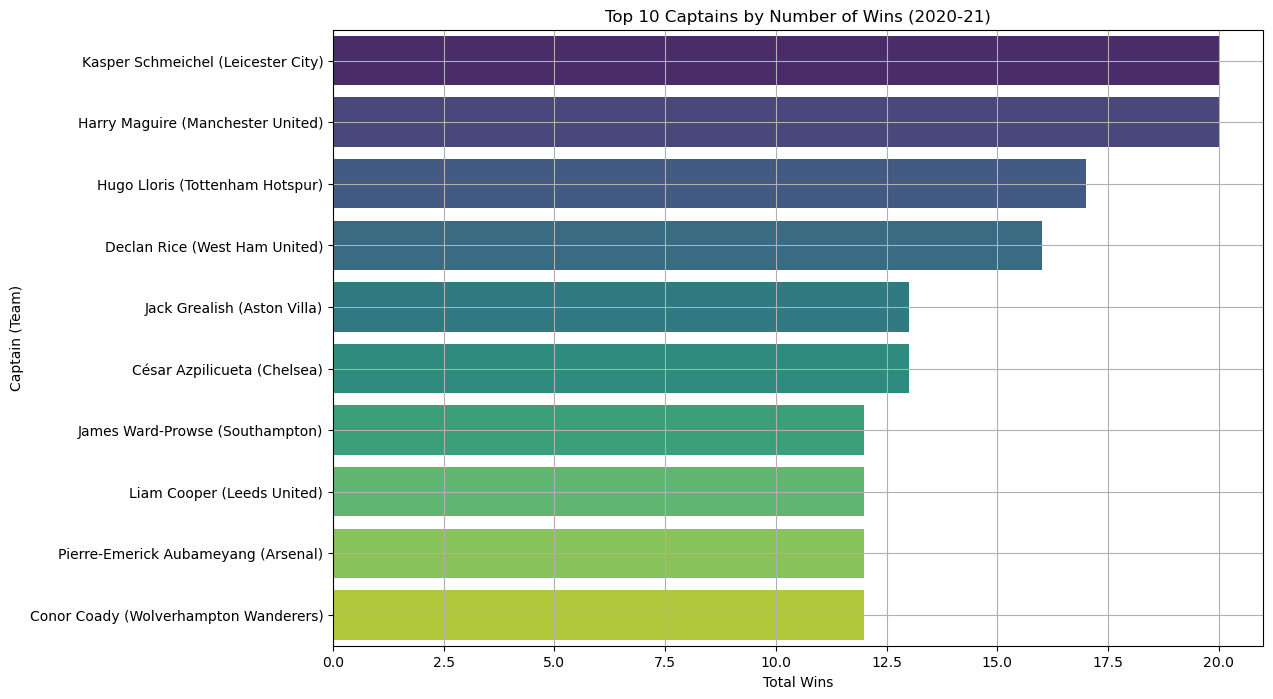

In [33]:
home_wins_captain = Home_df_21[Home_df_21['Result'] == 'W'].groupby(['Captain_Ref', 'Ref_Team']).size().reset_index(name='Wins') # type: ignore
away_wins_captain = Away_df_21[Away_df_21['Result'] == 'W'].groupby(['Captain_Ref', 'Ref_Team']).size().reset_index(name='Wins') # type: ignore
total_wins_captain = home_wins_captain.merge(away_wins_captain, on=['Captain_Ref', 'Ref_Team'], how='outer', suffixes=('_Home', '_Away'))
total_wins_captain['Total_Wins'] = total_wins_captain['Wins_Home'].fillna(0) + total_wins_captain['Wins_Away'].fillna(0)
total_wins_captain['Captain_Team'] = total_wins_captain['Captain_Ref'] + " (" + total_wins_captain['Ref_Team'] + ")"
top_10_captains = total_wins_captain.sort_values(by='Total_Wins', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='Total_Wins', y='Captain_Team', data=top_10_captains, palette='viridis',hue='Captain_Team')
plt.title('Top 10 Captains by Number of Wins (2020-21)')
plt.xlabel('Total Wins')
plt.ylabel('Captain (Team)')
plt.grid(True)
plt.show()

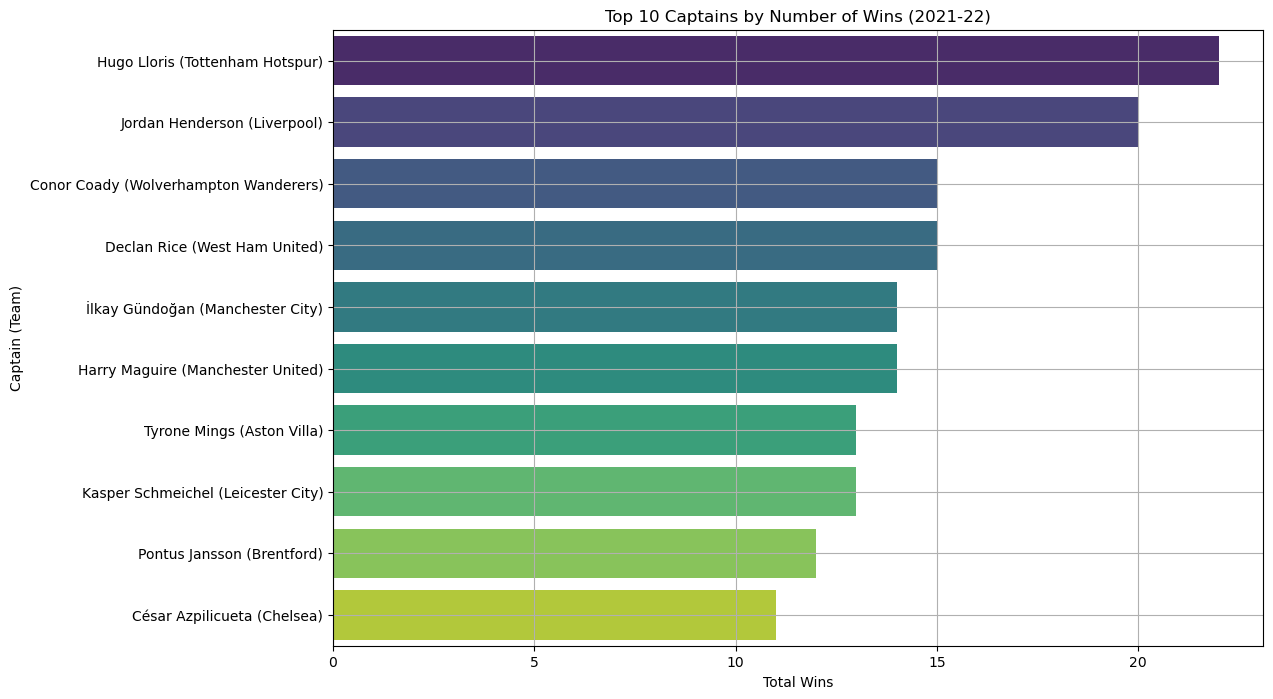

In [34]:
home_wins_captain = Home_df_22[Home_df_22['Result'] == 'W'].groupby(['Captain_Ref', 'Ref_Team']).size().reset_index(name='Wins') # type: ignore
away_wins_captain = Away_df_22[Away_df_22['Result'] == 'W'].groupby(['Captain_Ref', 'Ref_Team']).size().reset_index(name='Wins') # type: ignore
total_wins_captain = home_wins_captain.merge(away_wins_captain, on=['Captain_Ref', 'Ref_Team'], how='outer', suffixes=('_Home', '_Away'))
total_wins_captain['Total_Wins'] = total_wins_captain['Wins_Home'].fillna(0) + total_wins_captain['Wins_Away'].fillna(0)
total_wins_captain['Captain_Team'] = total_wins_captain['Captain_Ref'] + " (" + total_wins_captain['Ref_Team'] + ")"
top_10_captains = total_wins_captain.sort_values(by='Total_Wins', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='Total_Wins', y='Captain_Team', data=top_10_captains, palette='viridis',hue='Captain_Team')
plt.title('Top 10 Captains by Number of Wins (2021-22)')
plt.xlabel('Total Wins')
plt.ylabel('Captain (Team)')
plt.grid(True)
plt.show()

Captians with the most number of wins shows a personal level achievement and consistency, because we don't see the captain(s) of Manchester City, who won the Premier League in both seasons we analysed. This is because, their leadership kept on changing from players like Fernandinho, Ruben Dias. It takes great consistency to be the captain to have the most wins.

10.  What is the accuracy of each teams(Shots on Target/Shots)? Find the average accuracy and find the most accurate team.

In [35]:
print('Season 2020-21')
sot_21=df_21[['Ref_Team','Shots_Ref','Shots_On_Target_Ref']].copy()
sot_21['Shot_Accuracy']=sot_21['Shots_On_Target_Ref']/sot_21['Shots_Ref']
shot_acc=sot_21.groupby('Ref_Team').agg(Average_Shot_Accuracy=('Shot_Accuracy','mean')).reset_index()
shot_acc.rename(columns={'Ref_Team':"Teams"},inplace=True)
shot_acc.sort_values(by='Average_Shot_Accuracy',ascending=False,inplace=True)
print(shot_acc.to_string(index=False))
acc=shot_acc['Teams'].iloc[0]
print("\nThe team with the most accuracy is",acc)

Season 2020-21
                   Teams  Average_Shot_Accuracy
            Leeds United               0.407455
       Tottenham Hotspur               0.389599
         Manchester City               0.385012
             Southampton               0.384038
          Crystal Palace               0.382963
          Leicester City               0.377432
       Manchester United               0.375311
                 Everton               0.366424
         West Ham United               0.360656
                 Chelsea               0.357641
             Aston Villa               0.342437
               Liverpool               0.341790
    West Bromwich Albion               0.341550
        Newcastle United               0.339194
                 Arsenal               0.332338
 Wolverhampton Wanderers               0.325457
                 Burnley               0.322860
Brighton and Hove Albion               0.310411
        Sheffield United               0.286326
                  Fulham 

In [36]:
print('Season 2021-22')
sot_22=df_22[['Ref_Team','Shots_Ref','Shots_On_Target_Ref']].copy()
sot_22['Shot_Accuracy']=sot_22['Shots_On_Target_Ref']/sot_22['Shots_Ref']
shot_acc=sot_22.groupby('Ref_Team').agg(Average_Shot_Accuracy=('Shot_Accuracy','mean')).reset_index()
shot_acc.rename(columns={'Ref_Team':"Teams"},inplace=True)
shot_acc.sort_values(by='Average_Shot_Accuracy',ascending=False,inplace=True)
print(shot_acc.to_string(index=False))
acc=shot_acc['Teams'].iloc[0]
print("\nThe team with the most accuracy is",acc)

Season 2021-22
                   Teams  Average_Shot_Accuracy
          Leicester City               0.383861
       Manchester United               0.380276
       Tottenham Hotspur               0.376932
 Wolverhampton Wanderers               0.364459
          Crystal Palace               0.359052
             Aston Villa               0.344617
               Liverpool               0.344150
             Southampton               0.338860
                 Chelsea               0.335163
         Manchester City               0.333142
                 Arsenal               0.328977
               Brentford               0.326429
Brighton and Hove Albion               0.321901
         West Ham United               0.320530
        Newcastle United               0.312634
                 Watford               0.302585
            Leeds United               0.300541
                 Everton               0.299983
                 Burnley               0.287187
            Norwich City 

This analysis might be a bit misleading, as accuracy always doesn't translate to wins. This shows the team most successful to make the most of their shots to be on target. And the table toppers like Manchester City, Manchester United, Liverpool trailed behind Leicester City in the 2021-22 season and Leeds United in 2020-21 season.

<h1> Conclusion </h1>

From the different calculations made, we can see the dominance of Manchester City, in winning the games and in goal scoring. And the gap between the runner up and the other teams, in the both said cases, shows Manchester City in their best form. After coming from Bayern Munich, Pep Guardiola crafted out the 'Prime' Manchester City, who went on winning title after title, always staying in every relevant title races. They have won 5 out of 6 Premier League titles after Pep came to City, and in the one they didn't win, they came up as runners up. Some other key achievements by City includes treble in 2022-23 season, Erling Haaland being the top goal scorer in a season in the Premier League(36). All these and many other achievements paints the Manchester City as the most dominant club in the English Premier League currently.
Other notable performances by teams in the seasons 2020-22 are:
<ol>
<li>Liverpool (2020-2021): After winning the Premier League title in 2019-2020, Liverpool finished 3rd in the 2020-2021 season, despite facing numerous injuries to key players like Virgil van Dijk. They had a tough mid-season but bounced back towards the end, securing a Champions League spot.

<li>Chelsea (2020-2021): Chelsea finished 4th in the 2020-2021 season, which saw the managerial change from Frank Lampard to Thomas Tuchel. Tuchel led them to a solid finish, and they went on to win the UEFA Champions League in May 2021, defeating Manchester City in the final.

<li>Manchester United (2020-2021): Finishing 2nd in the 2020-2021 season, Manchester United had a strong season under Ole Gunnar Solskjaer. While they couldn’t match the consistency of Manchester City, they secured a Champions League qualification spot.

<li>Tottenham Hotspur (2020-2021): Tottenham had a fluctuating season, initially topping the league under José Mourinho in the early part of the season, but ultimately finishing 7th. Despite inconsistency, their attacking performances were a key highlight, with Harry Kane and Son Heung-min forming one of the best strike partnerships.

<li>Arsenal (2021-2022): Arsenal, under Mikel Arteta, showed significant improvement in the 2021-2022 season. Although they finished 5th, they were in the race for Champions League qualification until the final weeks, showcasing a developing team with young talents like Bukayo Saka and Emile Smith Rowe.

<li>Tottenham Hotspur (2021-2022): Tottenham made a strong comeback under Antonio Conte, finishing 4th in the 2021-2022 season and securing a return to the Champions League. Key performances from Harry Kane and Son Heung-min played a crucial role in their resurgence.

<li>Chelsea (2021-2022): After a strong start under Tuchel, Chelsea finished 3rd in the 2021-2022 season, remaining competitive throughout despite challenges in squad depth and injuries.

The project aimed to present the relevant data from the whole dataset, and visualize them. We all know the end results of these results such the dominance of Manchester City, but through this project, we are able to present the data that backed the facts. And also visualization helped in better understanding of the data and patterns. The project helped in improving Data Analysis skills. Here, python and it's important libraries for data analytics(Pandas, Seaborn, Matplotlib) were used. The project helped in analysing various meaningful informations from the raw dataset. To be specific, the project helps in analysing and representing graphically, the different information associated with the English Premier League. Some important concepts of Pandas were implemented like groupby, aggregate, pivot_table etc. The simpler concepts were also repeatedly used (sort, rename, slicing etc. ). The project helped to understand the step-by-step approach that is to be taken when a large dataset is provided for analysis. Moreover, the project helped to increase knowledge on difficult topics by studying various concepts thoroughly and bringing it into application. 